In [1]:
import eeg_decoder
import numpy as np
%load_ext autoreload
%autoreload 2

In [5]:
experiment_name = 'test_exp'
data_dir = f'./test_data/{experiment_name}'
exp = eeg_decoder.Experiment(experiment_name,data_dir,dev=False)

In [10]:
time_window = 25
time_step = 25
trial_bin_size = 10
n_splits = 30
group_dict = {0:[1],1:[3]}

wrangl = eeg_decoder.Wrangler(exp.info['times'],time_window,time_step,trial_bin_size,n_splits,group_dict)
clfr = eeg_decoder.Classification(wrangl,exp.nsub,num_labels=2)

In [12]:
for isub in range(exp.nsub):
    print(isub)
    xdata,ydata = exp.load_eeg(isub)
    xdata,ydata = wrangl.group_labels(xdata,ydata)
    for X_train_all, X_test_all, y_train, y_test in wrangl.split_data(xdata,ydata):
        X_train_all, X_test_all, y_train, y_test = wrangl.bin_and_balance_data(X_train_all, X_test_all, y_train, y_test) 
        y_test_shuffle = np.random.permutation(y_test)
        for X_train, X_test in wrangl.roll_over_time(X_train_all, X_test_all):
            clfr.decode(X_train,X_test,y_train,y_test,y_test_shuffle,isub)


In [7]:
interp = eeg_decoder.Interpreter(clfr, subtitle='1vs3')
# interp.save_results()

Significant timepoints: [1072]


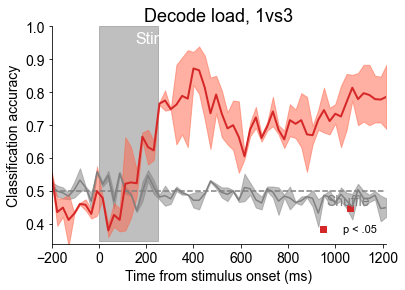

Mean delay accuracy: 0.7404471544715447
Mean delay S.D.: 0.056279325991512565


In [8]:
interp.plot_acc(significance_testing=False,savefig=False,ylim=[.34,1],chance_text_y=.23, title='Decode load, 1vs3')

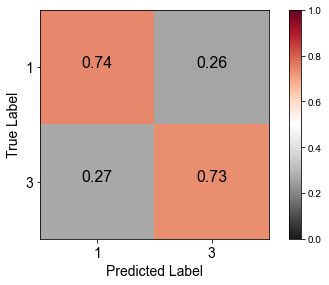

In [9]:
interp.plot_conf_mat()